# **Importing Libraries and Settings**

- **pandas, numpy**: For data loading, cleaning, and numerical operations.
- **matplotlib, seaborn**: For creating visualizations and exploring data patterns.
- **datetime**: For handling and manipulating date-related fields.
- **warnings**: To suppress unnecessary warning messages for cleaner output.
- **StandardScaler**: To normalize numerical features before clustering.
- **KMeans**: The clustering algorithm used for segmenting the data.
- **silhouette_score**: To evaluate the quality of the clustering results.
- **plt.style.use, sns.set_palette**: To improve the aesthetics of the plots.


In [ ]:
# Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# **Loading the Dataset**
This step reads the customer transaction data from the specified file path using `pandas` and displays the first few rows to verify that the dataset loaded correctly.


In [ ]:
customertransaction_df = pd.read_csv("/content/drive/MyDrive/Bank_Trust_Dataset.csv")
customertransaction_df.head()

,TransactionID,CustomerID,TransactionDate,TransactionTime,TransactionAmount,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,T9105905,C1419610,2021-06-18,74921,177.72,1991-08-13,F,East Gordonside,29923.49
1,T3229540,C1419610,2021-07-16,145601,304.89,1991-08-13,F,East Gordonside,29618.60
2,T5116286,C1419610,2021-01-14,113217,79.68,1991-08-13,F,East Gordonside,29538.92
3,T4475301,C5614226,2020-04-03,72506,3685.28,1956-09-29,M,Donaldfort,62152.00
4,T2953823,C5614226,2020-12-15,143619,5452.50,1956-09-29,M,Donaldfort,56699.50


In [ ]:
data_frame = customertransaction_df.copy()
df = data_frame.copy()

# **Phase 1: Exploratory Data Analysis**

### Basic info

This code performs a quick exploratory check of the dataset. It displays the dataset’s shape to show how many rows and columns it has, identifies the data types of each column to understand their structure, checks for missing values to highlight potential data quality issues, and provides basic statistical summaries to reveal patterns, ranges, and possible outliers. Overall, it gives a concise overview of the dataset’s structure and quality before deeper analysis.

In [ ]:

print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (947917, 9)

Data Types:
TransactionID          object
CustomerID             object
TransactionDate        object
TransactionTime         int64
TransactionAmount     float64
CustomerDOB            object
CustGender             object
CustLocation           object
CustAccountBalance    float64
dtype: object

Missing Values:
TransactionID         0
CustomerID            0
TransactionDate       0
TransactionTime       0
TransactionAmount     0
CustomerDOB           0
CustGender            0
CustLocation          0
CustAccountBalance    0
dtype: int64

Basic Statistics:
       TransactionTime  TransactionAmount  CustAccountBalance
count    947917.000000      947917.000000       947917.000000
mean     117862.497794        1575.545842        25664.142689
std       69295.879093        2670.821963        36565.245859
min           0.000000           1.000000            0.000000
25%       55820.000000          44.830000         2760.070000
50%      115937.000000          66.3600

## Checking for duplicates

This code checks the dataset’s integrity and consistency. It first identifies duplicate records overall and within the `TransactionID` column to ensure each transaction is unique. It then counts how many unique customers exist and shows the distribution of customer gender for demographic insight. Finally, it examines the range of birth dates to detect any invalid or unrealistic dates, helping validate data accuracy and reliability.


In [ ]:
# Check for duplicates
print("Duplicate transactions:", df.duplicated().sum())
print("Duplicate TransactionIDs:", df['TransactionID'].duplicated().sum())

# Check data consistency
print("\nUnique customers:", df['CustomerID'].nunique())
print("Gender distribution:")
print(df['CustGender'].value_counts())

# Check for invalid dates
print("\nDate range:")
print("Earliest DOB:", df['CustomerDOB'].min())
print("Latest DOB:", df['CustomerDOB'].max())

Duplicate transactions: 0
Duplicate TransactionIDs: 48431

Unique customers: 82000
Gender distribution:
CustGender
M    474360
F    473557
Name: count, dtype: int64

Date range:
Earliest DOB: 1944-10-24
Latest DOB: 2007-10-22


In [ ]:
df = df.drop_duplicates(subset=['TransactionID'])

In [ ]:
print("Duplicate transactions:", df.duplicated().sum())
print("Duplicate TransactionIDs:", df['TransactionID'].duplicated().sum())

Duplicate transactions: 0
Duplicate TransactionIDs: 0


## **Dataset Overview**

This code provides a concise overview of the dataset. It displays the dataset’s shape (rows and columns), counts the number of unique customers, and shows the transaction date range to understand the data’s time span. It also calculates the total transaction value to gauge overall sales volume and the average customer account balance, offering quick insights into the dataset’s scale and financial characteristics.


In [ ]:
print(" DATASET OVERVIEW ")
print(f"Dataset shape: {df.shape}")
print(f"Number of unique customers: {df['CustomerID'].nunique()}")
print(f"Date range: {df['TransactionDate'].min()} to {df['TransactionDate'].max()}")
print(f"Total transaction value: {df['TransactionAmount'].sum():,.2f}")
print(f"Average account balance: {df['CustAccountBalance'].mean():,.2f}")

 DATASET OVERVIEW 
Dataset shape: (899486, 9)
Number of unique customers: 81541
Date range: 2020-01-01 to 2022-12-31
Total transaction value: 1,416,692,154.20
Average account balance: 25,653.16


# **Basic dataset information**

This section offers a **structured exploratory overview** of the dataset:

**Dataset Structure:** It first displays the overall structure using `df.info()`, summarizing column names, data types, and non-null counts. The first 10 rows are shown to provide a preview of the data layout and sample entries.

**Basic Statistics:** It computes descriptive statistics for key numerical columns such as `TransactionAmount` and `CustAccountBalance`, including measures like mean, standard deviation, and quartiles to understand value distributions.

**Missing Values:** It then checks for missing data, calculating both the count and percentage of missing entries per column. This helps identify data quality issues and informs any necessary cleaning or imputation steps.


In [ ]:
#  Basic dataset information
print("\n DATASET STRUCTURE ")
print(df.info())
print("\nFirst 10 rows:")
display(df.head(10))

print("\n BASIC STATISTICS ")
print(df[['TransactionAmount', 'CustAccountBalance']].describe())

print("\n MISSING VALUES ")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])


 DATASET STRUCTURE 
<class 'pandas.core.frame.DataFrame'>
Index: 899486 entries, 0 to 947916
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TransactionID       899486 non-null  object 
 1   CustomerID          899486 non-null  object 
 2   TransactionDate     899486 non-null  object 
 3   TransactionTime     899486 non-null  int64  
 4   TransactionAmount   899486 non-null  float64
 5   CustomerDOB         899486 non-null  object 
 6   CustGender          899486 non-null  object 
 7   CustLocation        899486 non-null  object 
 8   CustAccountBalance  899486 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.6+ MB
None

First 10 rows:


,TransactionID,CustomerID,TransactionDate,TransactionTime,TransactionAmount,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,T9105905,C1419610,2021-06-18,74921,177.72,1991-08-13,F,East Gordonside,29923.49
1,T3229540,C1419610,2021-07-16,145601,304.89,1991-08-13,F,East Gordonside,29618.60
2,T5116286,C1419610,2021-01-14,113217,79.68,1991-08-13,F,East Gordonside,29538.92
3,T4475301,C5614226,2020-04-03,72506,3685.28,1956-09-29,M,Donaldfort,62152.00
4,T2953823,C5614226,2020-12-15,143619,5452.50,1956-09-29,M,Donaldfort,56699.50
5,T8158456,C5614226,2020-01-10,114835,7106.78,1956-09-29,M,Donaldfort,49592.72
6,T5402092,C5614226,2022-10-11,74538,4890.07,1956-09-29,M,Donaldfort,54482.79
7,T6234368,C5614226,2020-06-29,112742,5280.39,1956-09-29,M,Donaldfort,49202.40
8,T6072805,C5614226,2021-06-26,85357,6975.66,1956-09-29,M,Donaldfort,42226.74
9,T7427427,C5614226,2021-07-02,53145,6789.87,1956-09-29,M,Donaldfort,35436.87



 BASIC STATISTICS 
       TransactionAmount  CustAccountBalance
count      899486.000000       899486.000000
mean         1575.001895        25653.156604
std          2670.259484        36549.245326
min             1.000000            0.000000
25%            44.810000         2762.537500
50%            66.320000        11662.610000
75%          3237.147500        33533.147500
max         22032.730000       456249.980000

 MISSING VALUES 
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


# In-depth Transaction Analysis

This section performs a **comprehensive transaction analysis** to understand the financial behavior within the dataset.

It begins by summarizing key transaction metrics, including the **total number of transactions**, **average transaction amount**, and identifying the **largest** and **smallest** recorded transactions — providing a clear overview of overall spending activity.

Next, transactions are **categorized into defined monetary segments** using bins such as *Micro (0–100)*, *Small (100–500)*, *Medium (500–1K)*, *Large (1K–5K)*, and *Very Large (5K+)*. This segmentation enables a clearer understanding of customer spending patterns and helps identify which transaction ranges are most common, supporting deeper behavioral and financial segmentation analyses.


In [ ]:

print("\n=== TRANSACTION ANALYSIS ===")

# Transaction amount analysis
print(f"Total Transactions: {len(df):,}")
print(f"Average Transaction Amount: {df['TransactionAmount'].mean():.2f}")
print(f"Largest Transaction: {df['TransactionAmount'].max():.2f}")
print(f"Smallest Transaction: {df['TransactionAmount'].min():.2f}")

# Transaction amount segments
amount_bins = [0, 100, 500, 1000, 5000, float('inf')]
amount_labels = ['Micro (0-100)', 'Small (100-500)', 'Medium (500-1K)', 'Large (1K-5K)', 'Very Large (5K+)']
df['Amount_Segment'] = pd.cut(df['TransactionAmount'], bins=amount_bins, labels=amount_labels)

print("\nTransaction Amount Segments:")
print(df['Amount_Segment'].value_counts().sort_index())


=== TRANSACTION ANALYSIS ===
Total Transactions: 899,486
Average Transaction Amount: 1575.00
Largest Transaction: 22032.73
Smallest Transaction: 1.00

Transaction Amount Segments:
Amount_Segment
Micro (0-100)       566961
Small (100-500)      79936
Medium (500-1K)        591
Large (1K-5K)       115840
Very Large (5K+)    136158
Name: count, dtype: int64


# **Top 10 Customers by Transaction Amount**

This section identifies and analyzes the **top 10 customers based on their total transaction amounts**, providing valuable insights into high-value clients who contribute the most to overall revenue.

The code first aggregates key metrics per customer, including the **total amount spent**, **number of transactions**, **average transaction value**, **most recent account balance**, **gender**, and **location**. These aggregated statistics offer a detailed customer-level financial profile.

The data is then sorted to reveal the **top 10 highest spenders**, enabling a focused look at customer value distribution.

For visualization, two side-by-side bar charts are generated. The first chart highlights the **top 10 customers by total transaction amount**, illustrating spending concentration among high-value customers. The second chart displays the **top 10 customers by transaction count**, revealing those with the most frequent activity.

Together, these visuals support **customer segmentation and strategic decision-making**, helping identify both **high-spending** and **high-engagement** customers for potential loyalty programs, targeted marketing, or premium service offerings.



 TOP 10 CUSTOMERS BY TOTAL TRANSACTION AMOUNT 
Top 10 Customers:


,Total_Amount,Transaction_Count,Avg_Amount,Last_Balance,Gender,Location
CustomerID,,,,,,
C4616926,230287.98,44,5233.82,0.00,F,Lake Williamside
C4510031,202168.38,38,5320.22,0.00,M,East Kevin
C2162054,202143.59,35,5775.53,0.00,M,Port Terryville
C4986191,191194.21,42,4552.24,0.00,F,Bretthaven
C4626616,175436.51,34,5159.90,10675.14,F,Lisaburgh
C1906432,172851.89,36,4801.44,0.00,M,Rosstown
C6585409,160858.58,33,4874.50,18547.11,F,West Jayne
C2409527,148383.80,29,5116.68,0.00,M,Mauriceside
C5779944,146148.29,31,4714.46,7481.76,F,Port Jasonhaven


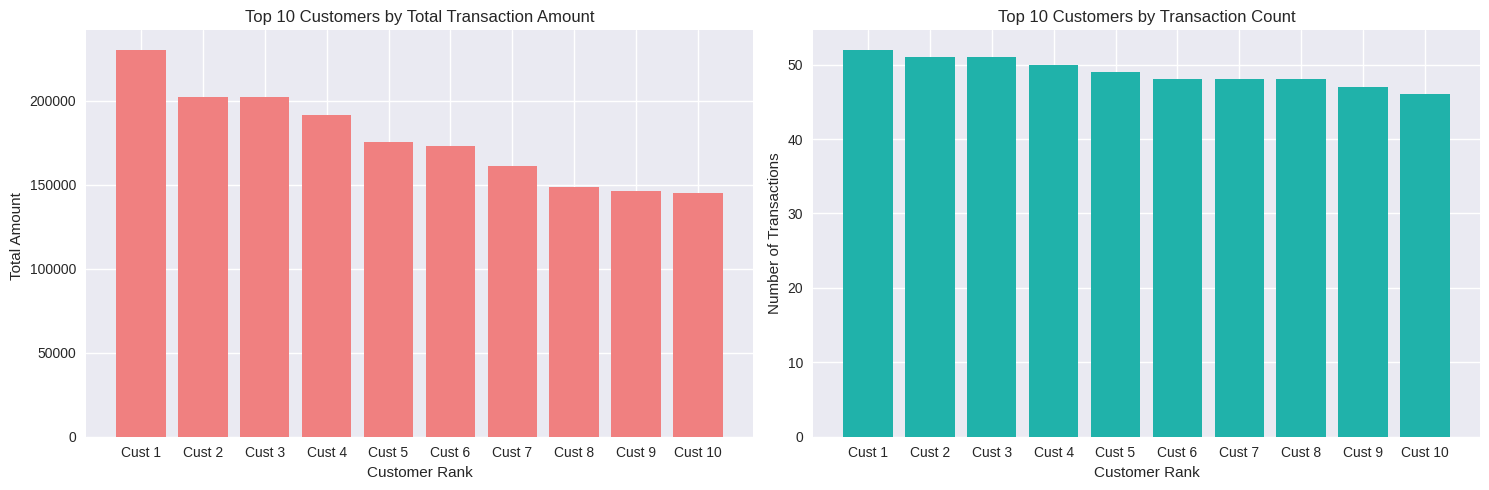

In [ ]:

print("\n TOP 10 CUSTOMERS BY TOTAL TRANSACTION AMOUNT ")
top_customers = df.groupby('CustomerID').agg({
    'TransactionAmount': ['sum', 'count', 'mean'],
    'CustAccountBalance': 'last',
    'CustGender': 'first',
    'CustLocation': 'first'
}).round(2)

top_customers.columns = ['Total_Amount', 'Transaction_Count', 'Avg_Amount', 'Last_Balance', 'Gender', 'Location']
top_customers = top_customers.sort_values('Total_Amount', ascending=False)

print("Top 10 Customers:")
display(top_customers.head(10))

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
top_10_amount = top_customers.head(10)
plt.bar(range(10), top_10_amount['Total_Amount'], color='lightcoral')
plt.title('Top 10 Customers by Total Transaction Amount')
plt.xlabel('Customer Rank')
plt.ylabel('Total Amount ')
plt.xticks(range(10), [f'Cust {i+1}' for i in range(10)])

plt.subplot(1, 2, 2)
top_10_count = top_customers.sort_values('Transaction_Count', ascending=False).head(10)
plt.bar(range(10), top_10_count['Transaction_Count'], color='lightseagreen')
plt.title('Top 10 Customers by Transaction Count')
plt.xlabel('Customer Rank')
plt.ylabel('Number of Transactions')
plt.xticks(range(10), [f'Cust {i+1}' for i in range(10)])

plt.tight_layout()
plt.show()

# Gender Distribution Analysis

This section conducts a **Gender Distribution Analysis** to examine how customer gender influences financial behavior and transaction patterns within the dataset.

The summary table presents aggregated metrics for each gender, including the **number of unique customers**, **total transaction amount**, **average transaction amount**, **transaction count**, and **average account balance**. This provides a quantitative overview of gender-based participation and spending tendencies.

The visualizations complement the statistical summary by depicting three key perspectives:

* A **pie chart** showing the proportion of male and female customers, offering a quick view of demographic distribution.
* A **bar chart** illustrating the **total transaction amount by gender**, highlighting which gender contributes more to overall spending.
* Another **bar chart** comparing **average account balances** by gender, revealing differences in financial standing or saving behavior.

Together, these analyses deliver actionable insights into **customer segmentation by gender**, which can guide **targeted marketing**, **financial product personalization**, and **customer engagement strategies** based on demographic dynamics.



 GENDER DISTRIBUTION ANALYSIS 
            Unique_Customers  Total_Amount  Avg_Amount  Transaction_Count  \
CustGender                                                                  
F                      40735  7.010943e+08     1560.61             449245   
M                      40973  7.155979e+08     1589.37             450241   

            Avg_Balance  
CustGender               
F              25792.69  
M              25513.93  


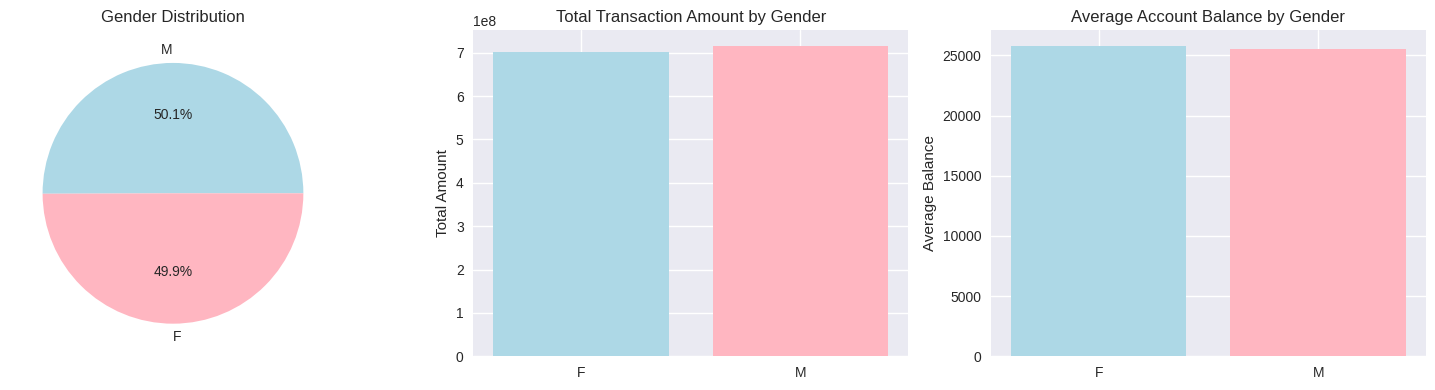

In [ ]:
# Gender Distribution Analysis
print("\n GENDER DISTRIBUTION ANALYSIS ")
gender_stats = df.groupby('CustGender').agg({
    'CustomerID': 'nunique',
    'TransactionAmount': ['sum', 'mean', 'count'],
    'CustAccountBalance': 'mean'
}).round(2)

gender_stats.columns = ['Unique_Customers', 'Total_Amount', 'Avg_Amount', 'Transaction_Count', 'Avg_Balance']
print(gender_stats)

# Visualization
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
gender_counts = df['CustGender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
plt.title('Gender Distribution')

plt.subplot(1, 3, 2)
gender_amount = df.groupby('CustGender')['TransactionAmount'].sum()
plt.bar(gender_amount.index, gender_amount.values, color=['lightblue', 'lightpink'])
plt.title('Total Transaction Amount by Gender')
plt.ylabel('Total Amount')

plt.subplot(1, 3, 3)
gender_avg_balance = df.groupby('CustGender')['CustAccountBalance'].mean()
plt.bar(gender_avg_balance.index, gender_avg_balance.values, color=['lightblue', 'lightpink'])
plt.title('Average Account Balance by Gender')
plt.ylabel('Average Balance')

plt.tight_layout()
plt.show()

# **Location Analysis**

This section performs a **comprehensive Location Analysis** to uncover geographic patterns in customer behavior, financial activity, and spending capacity.

The analytical summary aggregates data by `CustLocation`, showing the **number of unique customers**, **total and average transaction amounts**, **transaction counts**, and **average account balances** for each location. Sorting by customer count provides a clear picture of where the organization’s customer base is most concentrated.

The visualizations offer a multi-dimensional understanding of geographic trends:

* The **first chart** highlights the *top 10 locations by customer count*, showing where the majority of clients reside.
* The **second chart** focuses on the *highest total transaction volumes*, indicating financially active regions.
* The **third chart** reveals *average account balances* by location, reflecting the relative wealth or liquidity of customers in each area.
* The **final chart** ranks *locations by average transaction size*, identifying high-value transactional hubs.

Together, these insights enable a **data-driven understanding of regional performance**, helping guide **resource allocation, marketing focus, and expansion strategies** based on economic activity and customer engagement at the location level.



 LOCATION ANALYSIS 
Top 10 Locations by Customer Count:


,Unique_Customers,Total_Amount,Avg_Amount,Transaction_Count,Avg_Balance
CustLocation,,,,,
Smithmouth,61,597855.97,852.86,701,25962.40
Jonesmouth,51,590182.34,879.56,671,26721.03
Smithfort,47,498191.97,932.94,534,22978.75
Smithview,45,632685.51,1189.26,532,32495.64
Smithburgh,41,723601.38,1467.75,493,32262.18
Smithshire,39,1182398.76,2273.84,520,22592.17
Smithton,36,566158.26,1925.71,294,25632.37
Smithfurt,35,474992.87,1178.64,403,26640.62
Smithside,34,418122.88,937.50,446,24235.58


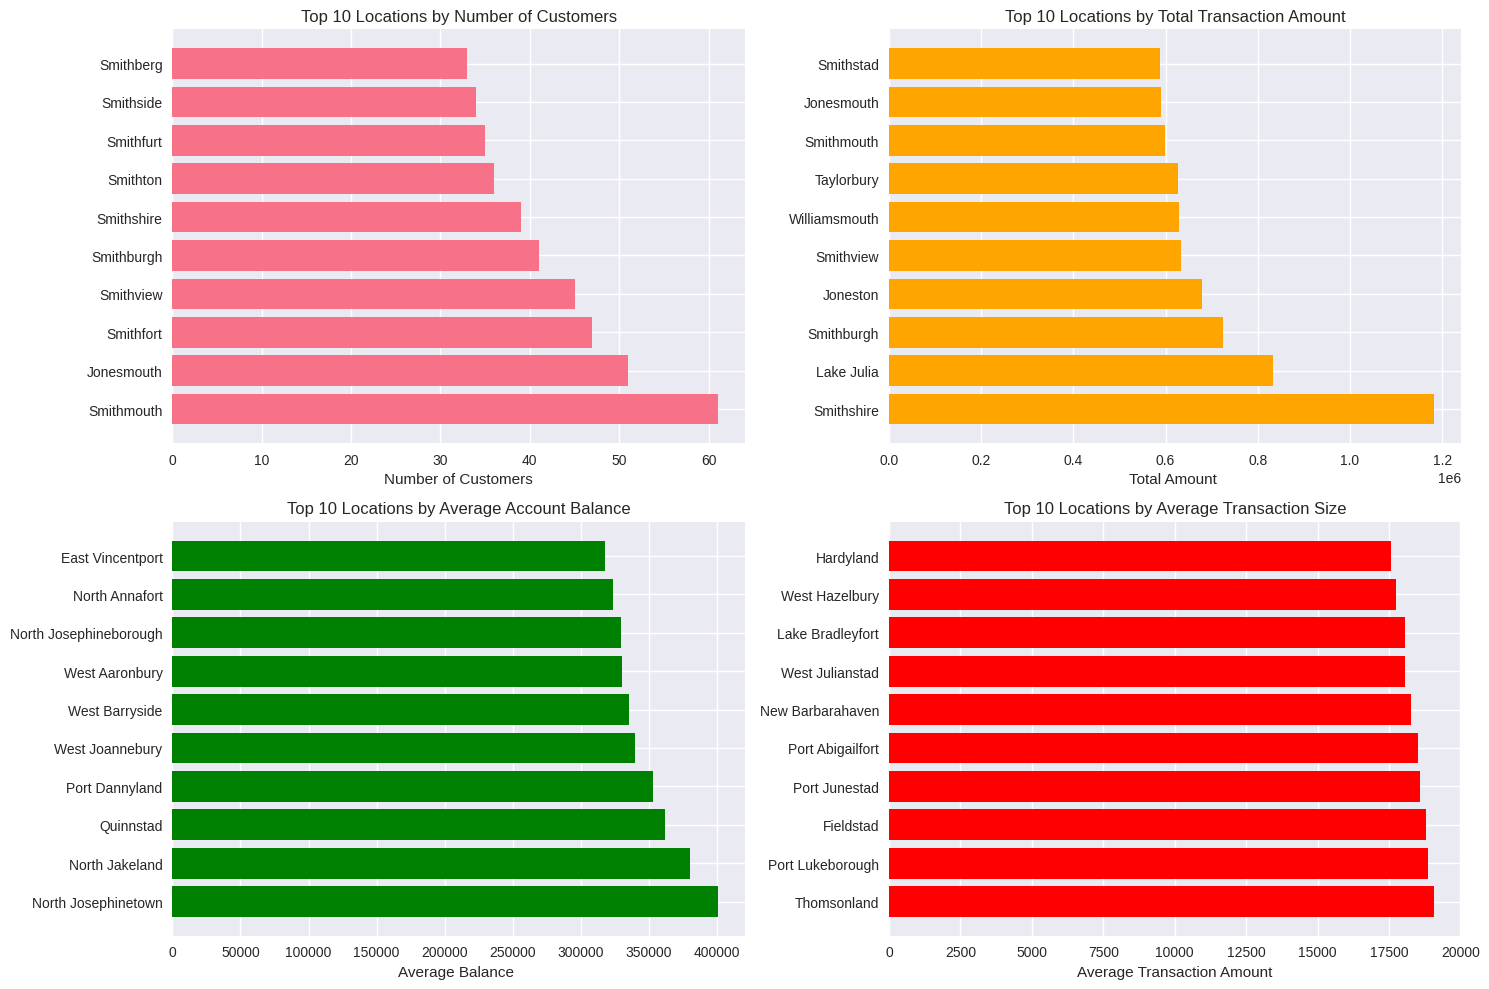

In [ ]:
#  Location Analysis
print("\n LOCATION ANALYSIS ")
location_stats = df.groupby('CustLocation').agg({
    'CustomerID': 'nunique',
    'TransactionAmount': ['sum', 'mean', 'count'],
    'CustAccountBalance': 'mean'
}).round(2)

location_stats.columns = ['Unique_Customers', 'Total_Amount', 'Avg_Amount', 'Transaction_Count', 'Avg_Balance']
location_stats = location_stats.sort_values('Unique_Customers', ascending=False)

print("Top 10 Locations by Customer Count:")
display(location_stats.head(10))

# Visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
top_locations_customers = location_stats.head(10)['Unique_Customers']
plt.barh(range(10), top_locations_customers.values)
plt.yticks(range(10), top_locations_customers.index)
plt.title('Top 10 Locations by Number of Customers')
plt.xlabel('Number of Customers')

plt.subplot(2, 2, 2)
top_locations_amount = location_stats.sort_values('Total_Amount', ascending=False).head(10)['Total_Amount']
plt.barh(range(10), top_locations_amount.values, color='orange')
plt.yticks(range(10), top_locations_amount.index)
plt.title('Top 10 Locations by Total Transaction Amount')
plt.xlabel('Total Amount ')

plt.subplot(2, 2, 3)
top_locations_balance = location_stats.sort_values('Avg_Balance', ascending=False).head(10)['Avg_Balance']
plt.barh(range(10), top_locations_balance.values, color='green')
plt.yticks(range(10), top_locations_balance.index)
plt.title('Top 10 Locations by Average Account Balance')
plt.xlabel('Average Balance ')

plt.subplot(2, 2, 4)
location_transaction_size = location_stats.sort_values('Avg_Amount', ascending=False).head(10)['Avg_Amount']
plt.barh(range(10), location_transaction_size.values, color='red')
plt.yticks(range(10), location_transaction_size.index)
plt.title('Top 10 Locations by Average Transaction Size')
plt.xlabel('Average Transaction Amount')

plt.tight_layout()
plt.show()

# Temporal Analysis

This section conducts a **Temporal Analysis** to identify patterns in customer transactions across different time periods — monthly, weekly, and hourly. The dataset’s date and time fields are transformed to extract meaningful temporal components such as `TransactionMonth`, `TransactionDay`, and `TransactionHour`, allowing for a detailed breakdown of transaction behavior over time.

The summary table presents aggregated monthly metrics, including **transaction count**, **total transaction amount**, and **unique customers**, providing a macro-level view of business activity trends.

The visualization suite enriches this analysis through four perspectives:

* The **first line plot** illustrates the *monthly transaction count trend*, showing fluctuations in activity volume.
* The **second plot** tracks the *total transaction amount over time*, highlighting seasonal or cyclical financial surges.
* The **third chart** displays the *day-of-week transaction distribution*, revealing customer engagement patterns across weekdays and weekends.
* The **fourth chart** maps *hourly transaction frequency*, pinpointing peak transactional periods within each day.

Together, these insights deliver a comprehensive temporal overview, useful for **forecasting demand**, **optimizing service availability**, and **strategically timing promotional or operational efforts** based on customer transaction rhythms.



 TEMPORAL ANALYSIS 
Monthly Trends:


,Transaction_Count,Total_Amount,Unique_Customers
TransactionMonth,,,
2020-01,25380,40159980.12,20371
2020-02,23990,37657697.26,19415
2020-03,25840,41473881.78,20668
2020-04,24625,38763119.56,19990
2020-05,25721,40244569.96,20589
2020-06,24658,38301846.62,19841
2020-07,25389,39790048.28,20386
2020-08,25515,40287170.97,20419
2020-09,24464,38479159.55,19802


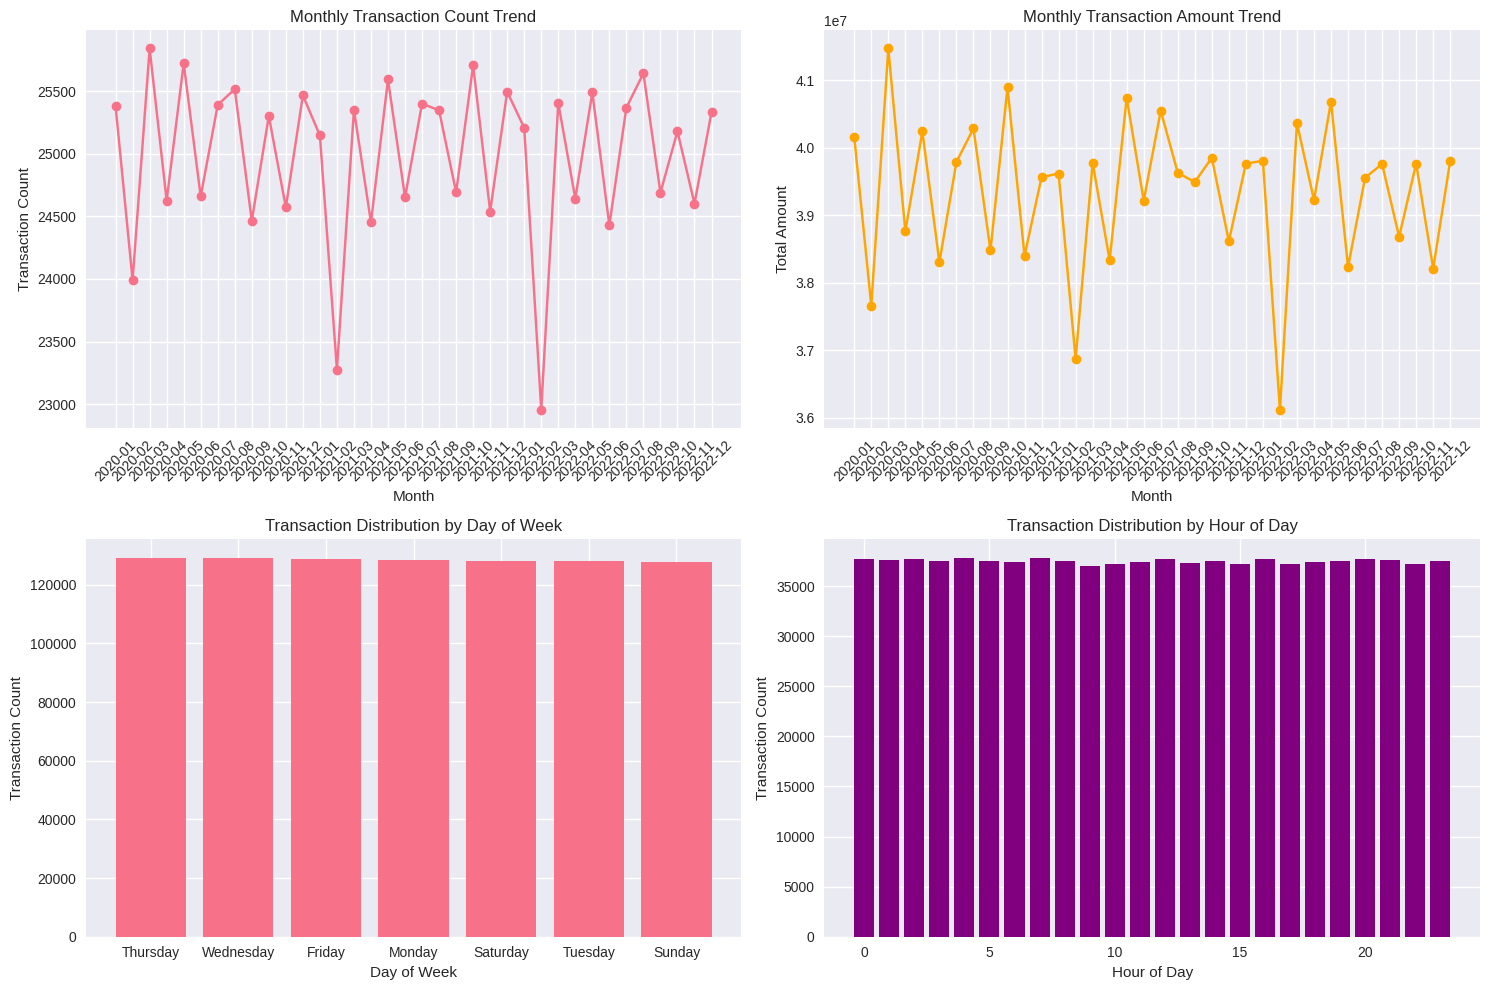

In [ ]:
# Temporal Analysis
print("\n TEMPORAL ANALYSIS ")
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M')
df['TransactionDay'] = df['TransactionDate'].dt.day_name()
df['TransactionHour'] = df['TransactionTime'] // 10000  # Extract hour

# Monthly trends
monthly_trends = df.groupby('TransactionMonth').agg({
    'TransactionID': 'count',
    'TransactionAmount': 'sum',
    'CustomerID': 'nunique'
}).round(2)

monthly_trends.columns = ['Transaction_Count', 'Total_Amount', 'Unique_Customers']
print("Monthly Trends:")
display(monthly_trends)

# Visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(monthly_trends.index.astype(str), monthly_trends['Transaction_Count'], marker='o')
plt.title('Monthly Transaction Count Trend')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.plot(monthly_trends.index.astype(str), monthly_trends['Total_Amount'], marker='o', color='orange')
plt.title('Monthly Transaction Amount Trend')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
day_distribution = df['TransactionDay'].value_counts()
plt.bar(day_distribution.index, day_distribution.values)
plt.title('Transaction Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Transaction Count')

plt.subplot(2, 2, 4)
hour_distribution = df['TransactionHour'].value_counts().sort_index()
plt.bar(hour_distribution.index, hour_distribution.values, color='purple')
plt.title('Transaction Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')

plt.tight_layout()
plt.show()

## Customer Behavior Analysis

This section performs an in-depth **Customer Behavior Analysis** to understand transaction activity patterns, spending capacity, and overall financial engagement among customers. It examines both transactional frequency and account balance characteristics to uncover distinct behavioral profiles.

The statistical overview first summarizes **transaction activity per customer**, reporting key indicators such as the *average and median number of transactions*, along with identifying the *most and least active customers*. Customers are then categorized into **activity segments** — `One-Time`, `Occasional`, `Regular`, and `Frequent` — to highlight engagement intensity across the user base.

In parallel, account balances are segmented into **financial tiers** (`Very Low`, `Low`, `Medium`, `High`, and `Very High`), allowing for insights into economic diversity and customer wealth distribution.

The visualizations further clarify these dynamics:

* The **first bar chart** displays customer distribution across activity segments, revealing how transaction frequency varies within the customer pool.
* The **second chart** presents the distribution of customers across account balance levels, highlighting financial stratification.
* The **third heatmap** visualizes correlations among key numerical features such as transaction amount, balance, and transaction time — providing clues about behavioral interdependencies.

Together, these analyses paint a **comprehensive behavioral profile** of the customer base, enabling **data-driven segmentation, targeted retention efforts, and personalized financial strategy development**.



=== CUSTOMER BEHAVIOR ANALYSIS ===
Average transactions per customer: 11.03
Median transactions per customer: 11.00
Most active customer: 52 transactions
Least active customer: 1 transactions

Customer Activity Segments:
One-Time       9416
Occasional    23800
Regular       19909
Frequent      28416
Name: count, dtype: int64

Account Balance Segments:
Balance_Segment
Very Low      63013
Low          152714
Medium       262328
High         191541
Very High    145535
Name: count, dtype: int64


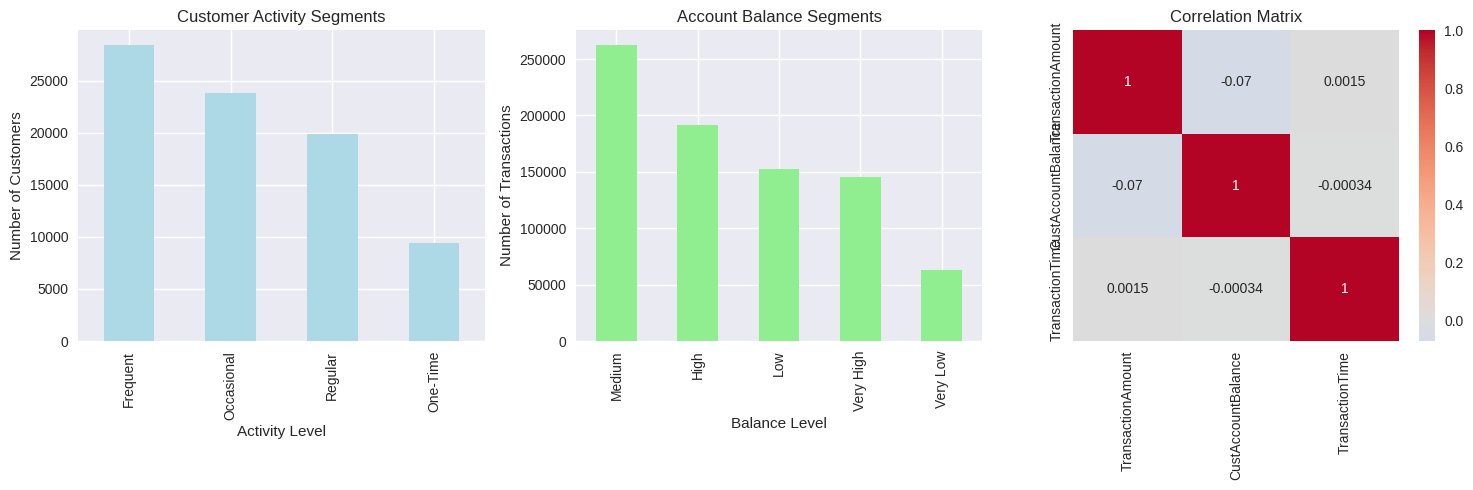

In [ ]:
# Customer Behavior Analysis
print("\n=== CUSTOMER BEHAVIOR ANALYSIS ===")

# Transactions per customer
transactions_per_customer = df.groupby('CustomerID').size()
print(f"Average transactions per customer: {transactions_per_customer.mean():.2f}")
print(f"Median transactions per customer: {transactions_per_customer.median():.2f}")
print(f"Most active customer: {transactions_per_customer.max()} transactions")
print(f"Least active customer: {transactions_per_customer.min()} transactions")

# Customer segmentation by activity
activity_segments = pd.cut(transactions_per_customer,
                          bins=[0, 1, 5, 15, float('inf')],
                          labels=['One-Time', 'Occasional', 'Regular', 'Frequent'])
print("\nCustomer Activity Segments:")
print(activity_segments.value_counts().sort_index())

# Balance segments
balance_segments = pd.cut(df['CustAccountBalance'],
                         bins=[0, 1000, 5000, 20000, 50000, float('inf')],
                         labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['Balance_Segment'] = balance_segments

print("\nAccount Balance Segments:")
print(df['Balance_Segment'].value_counts().sort_index())

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
activity_segments.value_counts().plot(kind='bar', color='lightblue')
plt.title('Customer Activity Segments')
plt.xlabel('Activity Level')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 2)
df['Balance_Segment'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Account Balance Segments')
plt.xlabel('Balance Level')
plt.ylabel('Number of Transactions')

plt.subplot(1, 3, 3)
# Correlation heatmap for numerical variables
corr_matrix = df[['TransactionAmount', 'CustAccountBalance', 'TransactionTime']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

### **Data used for Exploratory Data Analysis**

In [ ]:
df.head()

,TransactionID,CustomerID,TransactionDate,TransactionTime,TransactionAmount,CustomerDOB,CustGender,CustLocation,CustAccountBalance,Amount_Segment,TransactionMonth,TransactionDay,TransactionHour,Balance_Segment
0,T9105905,C1419610,2021-06-18,74921,177.72,1991-08-13,F,East Gordonside,29923.49,Small (100-500),2021-06,Friday,7,High
1,T3229540,C1419610,2021-07-16,145601,304.89,1991-08-13,F,East Gordonside,29618.60,Small (100-500),2021-07,Friday,14,High
2,T5116286,C1419610,2021-01-14,113217,79.68,1991-08-13,F,East Gordonside,29538.92,Micro (0-100),2021-01,Thursday,11,High
3,T4475301,C5614226,2020-04-03,72506,3685.28,1956-09-29,M,Donaldfort,62152.00,Large (1K-5K),2020-04,Friday,7,Very High
4,T2953823,C5614226,2020-12-15,143619,5452.50,1956-09-29,M,Donaldfort,56699.50,Very Large (5K+),2020-12,Tuesday,14,Very High


## **Phase 2: Data Preprocessing**

This phase focuses on cleaning and preparing the dataset for analysis or model training. It ensures that all entries are valid, consistent, and ready for feature extraction.

**Step-by-step explanation:**


**1. Checking for Missing Values**
The script examines the dataset for any missing values and prints the total count before cleaning begins.

**2. Removing Missing Entries**
Any rows containing missing data are removed to maintain data integrity. The number of rows removed is displayed.

**3. Removing Duplicate Transactions**
Duplicate records are identified based on the `TransactionID` column and removed. This ensures each transaction appears only once.

**4. Converting Transaction Dates**
The `TransactionDate` column is converted into a proper datetime format using `pandas.to_datetime()`, enabling accurate time-based operations later.

**5. Final Dataset Summary**
The final shape of the dataset (rows and columns) and the count of unique customers (`CustomerID`) are printed to confirm successful preprocessing.

**Outcome:**
After this phase, the dataset is free from missing values and duplicates, and all transaction dates are correctly formatted. The cleaned dataset is now ready for the next stages of data analysis or modeling.


In [ ]:

print("=" * 50)
print("PHASE 2: DATA PREPROCESSING")
print("=" * 50)

# Handle missing values if any
print("Checking for missing values...")
print(f"Missing values before cleaning: {data_frame.isnull().sum()}")

# Remove any remaining missing values
initial_count = len(data_frame)
data_frame = data_frame.dropna()
print(f"Removed {initial_count - len(data_frame)} rows with missing values")

# Remove duplicate transactions
initial_count = len(data_frame)
data_frame = data_frame.drop_duplicates(subset=['TransactionID'])
print(f"Removed {initial_count - len(data_frame)} duplicate transactions")

# Ensure proper datetime format
data_frame['TransactionDate'] = pd.to_datetime(data_frame['TransactionDate'])
print(f"Final dataset shape: {data_frame.shape}")
print(f"Unique customers: {data_frame['CustomerID'].nunique()}")

PHASE 2: DATA PREPROCESSING
Checking for missing values...
Missing values before cleaning: 0
Removed 0 rows with missing values
Removed 48431 duplicate transactions
Final dataset shape: (899486, 9)
Unique customers: 81541


## Phase 3: Feature Engineering (RFM Metrics)

This phase focuses on transforming cleaned transactional data into meaningful features that help assess customer behavior and value. The **RFM** (Recency, Frequency, Monetary) model is used to segment customers based on their purchase patterns.

**Step-by-step explanation:**

**1. Setting the Reference Date**
Defines the reference date as one day after the most recent transaction. This date is used to calculate how recently each customer made a purchase.

**2. Computing RFM Metrics**
Aggregates data by `CustomerID` and calculates three key metrics:

* **Recency:** The number of days since the customer’s last purchase (`reference_date - last_transaction_date`).
* **Frequency:** The total number of transactions made by the customer.
* **Monetary:** The total amount spent by the customer.

The resulting dataframe (`rfm_df`) summarizes these metrics for each unique customer.

**3. Adding Customer Demographics**
Merges customer demographic attributes (such as date of birth, gender, location, and account balance) into the RFM dataframe for enriched analysis.

**4. RFM Summary Statistics**
Prints summary statistics (`mean`, `min`, `max`, `quartiles`, etc.) for the Recency, Frequency, and Monetary columns, giving an overview of customer distribution and spending behavior.

**5. Displaying Sample Data**
Shows the first 10 rows of the final RFM dataframe for verification and inspection.


In [ ]:

print("\n" + "=" * 50)
print("PHASE 3: FEATURE ENGINEERING (RFM METRICS)")
print("=" * 50)

# Set reference date (day after last transaction)
reference_date = df['TransactionDate'].max() + pd.Timedelta(days=1)
print(f"Reference date for Recency calculation: {reference_date.date()}")

# Calculate RFM metrics for each customer
rfm_df = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days,  # Recency
    'TransactionID': 'count',                                      # Frequency
    'TransactionAmount': 'sum'                                     # Monetary
}).reset_index()

rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print(f"RFM dataframe shape: {rfm_df.shape}")
rfm_df.head()



PHASE 3: FEATURE ENGINEERING (RFM METRICS)
Reference date for Recency calculation: 2023-01-01
RFM dataframe shape: (81541, 4)


,CustomerID,Recency,Frequency,Monetary
0,C1000107,1040,1,96.41
1,C1000111,8,16,819.81
2,C1000159,106,15,695.53
3,C1000852,178,24,1355.99
4,C1000896,56,14,65914.10


In [ ]:

# Add customer demographics to RFM data
customer_demographics = df.groupby('CustomerID').agg({
    'CustomerDOB': 'first',
    'CustGender': 'first',
    'CustLocation': 'first',
    'CustAccountBalance': 'last'
}).reset_index()
customer_demographics.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,C1000107,2001-06-27,F,South Josh,1150.66
1,C1000111,1952-11-18,M,New Peter,52895.11
2,C1000159,1988-07-23,M,Lake Duncanburgh,3006.98
3,C1000852,1985-10-06,M,Thomasborough,11922.49
4,C1000896,1945-04-10,M,East Kim,43815.21


In [ ]:

rfm_df = rfm_df.merge(customer_demographics, on='CustomerID', how='left')

print("\nRFM Metrics Summary:")
print(rfm_df[['Recency', 'Frequency', 'Monetary']].describe())

# Display first few rows of RFM data
print("\nFirst 10 rows of RFM data:")
display(rfm_df.head(10))


RFM Metrics Summary:
            Recency     Frequency       Monetary
count  81541.000000  81541.000000   81541.000000
mean     187.824677     11.031089   17373.985531
std      237.063205      8.324877   30557.214473
min        1.000000      1.000000       1.300000
25%       31.000000      3.000000     725.310000
50%       86.000000     11.000000    1090.810000
75%      243.000000     18.000000   18205.760000
max     1096.000000     52.000000  230287.980000

First 10 rows of RFM data:


,CustomerID,Recency,Frequency,Monetary,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,C1000107,1040,1,96.41,2001-06-27,F,South Josh,1150.66
1,C1000111,8,16,819.81,1952-11-18,M,New Peter,52895.11
2,C1000159,106,15,695.53,1988-07-23,M,Lake Duncanburgh,3006.98
3,C1000852,178,24,1355.99,1985-10-06,M,Thomasborough,11922.49
4,C1000896,56,14,65914.10,1945-04-10,M,East Kim,43815.21
5,C1000976,72,19,1064.70,2003-06-24,F,New Nigelville,1660.27
6,C1001005,246,13,670.30,1960-10-12,F,New Frances,51131.84
7,C1001021,458,1,4080.97,1987-06-26,M,Roseland,512.70
8,C1001094,88,19,96064.36,1999-12-16,F,West Reeceborough,0.00
9,C1001172,642,1,7376.57,2002-05-29,F,Brownchester,5539.94


## **RFM Scoring and Customer Segmentation**

This section focuses on converting the calculated **RFM metrics** into standardized scores and combining them to segment customers based on behavior and value.

**1. Creating RFM Scores**
Each RFM metric is converted into a **1–5 scale** using `pd.qcut`, which divides data into five equal groups (quintiles):

* **Recency (R_Score):** Customers who purchased more recently get higher scores (5 = most recent, 1 = least recent).
* **Frequency (F_Score):** Customers with more transactions receive higher scores (5 = most frequent).
* **Monetary (M_Score):** Customers who spent more get higher scores (5 = highest spenders).

**2. Converting Scores to Numeric Format**
All RFM score columns are converted to integer types for mathematical operations and easier manipulation.

**3. Combining Scores**
Two additional fields are created:

* **RFM_Score:** The sum of all three scores, providing a total behavioral score.
* **RFM_Group:** A concatenated string representation (e.g., "543") for easier segment identification.

**4. RFM Scoring Summary and Distribution**
Summary statistics and value counts are displayed for each score to visualize the distribution and ensure the scoring is balanced across customers.


In [ ]:

print("\n" + "=" * 50)
print("PHASE 4: RFM SCORING AND SEGMENTATION")
print("=" * 50)

# Create RFM scores (1-5 scale)
# Recency: lower recency = better (more recent)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5, 4, 3, 2, 1])

# Frequency: higher frequency = better
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], q=5, labels=[1, 2, 3, 4, 5])

# Monetary: higher monetary = better
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=5, labels=[1, 2, 3, 4, 5])



PHASE 4: RFM SCORING AND SEGMENTATION


In [ ]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,CustomerDOB,CustGender,CustLocation,CustAccountBalance,R_Score,F_Score,M_Score
0,C1000107,1040,1,96.41,2001-06-27,F,South Josh,1150.66,1,1,1
1,C1000111,8,16,819.81,1952-11-18,M,New Peter,52895.11,5,4,2
2,C1000159,106,15,695.53,1988-07-23,M,Lake Duncanburgh,3006.98,3,4,2
3,C1000852,178,24,1355.99,1985-10-06,M,Thomasborough,11922.49,2,5,4
4,C1000896,56,14,65914.10,1945-04-10,M,East Kim,43815.21,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...
81536,C9999410,118,17,77370.14,1982-11-07,F,Randallton,44182.03,3,4,5
81537,C9999580,174,2,363.63,1969-03-12,F,Crosstown,36964.87,2,1,1
81538,C9999605,110,18,916.18,1961-12-30,F,Morrisonville,7259.05,3,4,2
81539,C9999758,375,3,623.11,1973-09-07,M,East Natasha,20600.10,1,2,1


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81541 entries, 0 to 81540
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CustomerID          81541 non-null  object  
 1   Recency             81541 non-null  int64   
 2   Frequency           81541 non-null  int64   
 3   Monetary            81541 non-null  float64 
 4   CustomerDOB         81541 non-null  object  
 5   CustGender          81541 non-null  object  
 6   CustLocation        81541 non-null  object  
 7   CustAccountBalance  81541 non-null  float64 
 8   R_Score             81541 non-null  category
 9   F_Score             81541 non-null  category
 10  M_Score             81541 non-null  category
dtypes: category(3), float64(2), int64(2), object(4)
memory usage: 5.2+ MB


In [ ]:

# Convert scores to numeric
rfm_df['R_Score'] = rfm_df['R_Score'].astype(int)
rfm_df['F_Score'] = rfm_df['F_Score'].astype(int)
rfm_df['M_Score'] = rfm_df['M_Score'].astype(int)


In [ ]:

# Create RFM combined score
rfm_df['RFM_Score'] = rfm_df['R_Score'] + rfm_df['F_Score'] + rfm_df['M_Score']
rfm_df['RFM_Group'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

print("RFM Scoring Summary:")
print(rfm_df[['R_Score', 'F_Score', 'M_Score', 'RFM_Score']].describe())

# Display score distributions
print("\nRFM Score Distributions:")
print("R_Score distribution:")
print(rfm_df['R_Score'].value_counts().sort_index())
print("\nF_Score distribution:")
print(rfm_df['F_Score'].value_counts().sort_index())
print("\nM_Score distribution:")
print(rfm_df['M_Score'].value_counts().sort_index())

RFM Scoring Summary:
            R_Score       F_Score       M_Score     RFM_Score
count  81541.000000  81541.000000  81541.000000  81541.000000
mean       3.006414      2.916790      2.999975      8.923180
std        1.417270      1.401471      1.414231      3.188223
min        1.000000      1.000000      1.000000      3.000000
25%        2.000000      2.000000      2.000000      6.000000
50%        3.000000      3.000000      3.000000      9.000000
75%        4.000000      4.000000      4.000000     12.000000
max        5.000000      5.000000      5.000000     15.000000

RFM Score Distributions:
R_Score distribution:
R_Score
1    16284
2    16221
3    16284
4    16192
5    16560
Name: count, dtype: int64

F_Score distribution:
F_Score
1    18461
2    14755
3    17047
4    17664
5    13614
Name: count, dtype: int64

M_Score distribution:
M_Score
1    16309
2    16308
3    16308
4    16308
5    16308
Name: count, dtype: int64


In [ ]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,CustomerDOB,CustGender,CustLocation,CustAccountBalance,R_Score,F_Score,M_Score,RFM_Score,RFM_Group
0,C1000107,1040,1,96.41,2001-06-27,F,South Josh,1150.66,1,1,1,3,111
1,C1000111,8,16,819.81,1952-11-18,M,New Peter,52895.11,5,4,2,11,542
2,C1000159,106,15,695.53,1988-07-23,M,Lake Duncanburgh,3006.98,3,4,2,9,342
3,C1000852,178,24,1355.99,1985-10-06,M,Thomasborough,11922.49,2,5,4,11,254
4,C1000896,56,14,65914.10,1945-04-10,M,East Kim,43815.21,4,3,5,12,435


### **K-Means Clustering Preparation for RFM Analysis**

This section prepares the **RFM dataset** for clustering analysis using the **K-Means algorithm** by transforming, scaling, and structuring the data to ensure optimal performance and accurate segmentation.

**1. Selecting Relevant Features**
Only the key RFM metrics — `Recency`, `Frequency`, and `Monetary` — are extracted for clustering since they represent customer engagement and value patterns.

**2. Handling Skewness with Log Transformation**
Transaction data often exhibits right-skewed distributions (a few customers spend or purchase far more than others).
To stabilize variance and reduce skewness, a **log(1 + x)** transformation is applied to each metric.
This transformation makes the data more normally distributed, improving clustering quality.

**3. Standardizing the Features**
K-Means is sensitive to the scale of features. Therefore, each transformed variable is standardized using `StandardScaler`, which rescales data to have zero mean and unit variance.
This ensures that all features contribute equally to the clustering process, preventing large-scale variables (like Monetary) from dominating the algorithm.

**4. Final Output**
The processed dataset (`rfm_scaled_df`) is ready for clustering and contains the standardized `Recency`, `Frequency`, and `Monetary` values suitable for input into the K-Means model.


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>,
        <Axes: title={'center': 'Monetary'}>],
       [<Axes: title={'center': 'CustAccountBalance'}>,
        <Axes: title={'center': 'R_Score'}>,
        <Axes: title={'center': 'F_Score'}>],
       [<Axes: title={'center': 'M_Score'}>,
        <Axes: title={'center': 'RFM_Score'}>,
        <Axes: title={'center': 'Cluster'}>]], dtype=object)

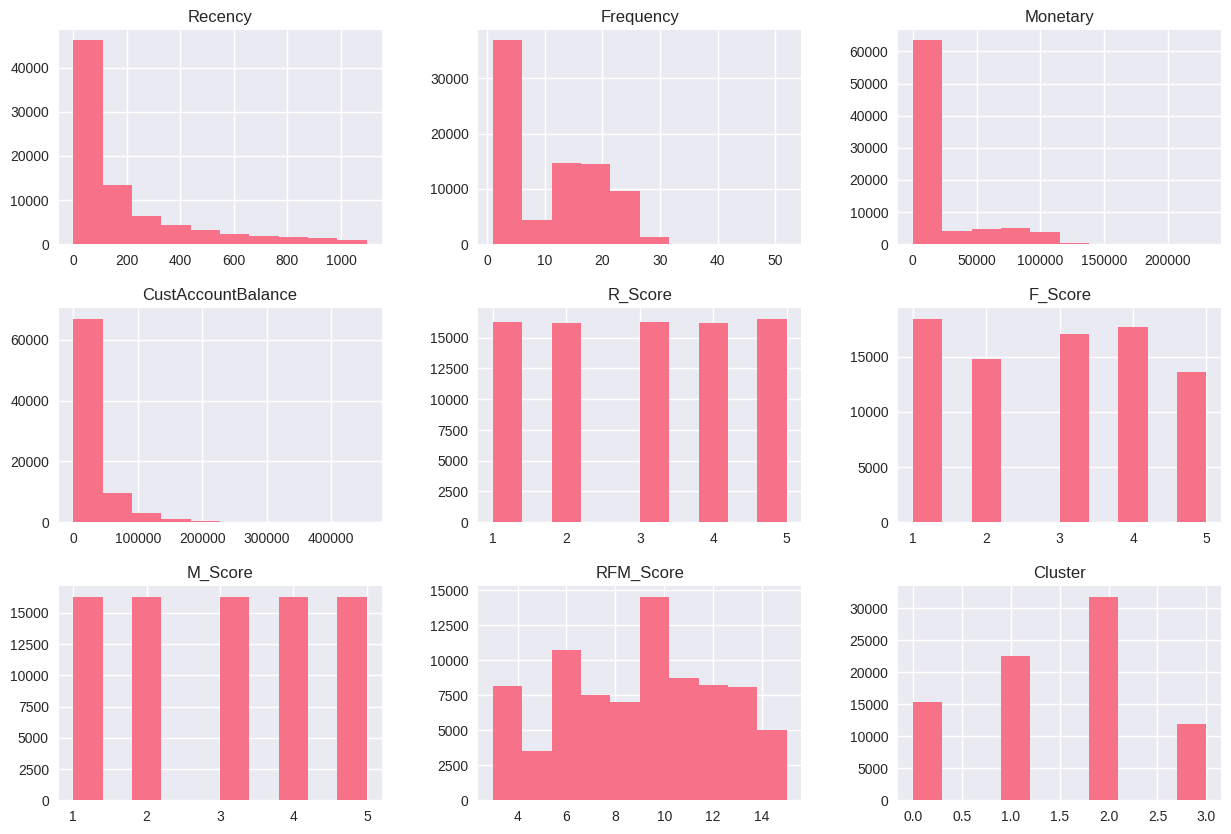

In [ ]:
rfm_df.hist(figsize=(15, 10))

In [ ]:

print("\n=== K-MEANS CLUSTERING FOR RFM ===")


# Prepare data for clustering
rfm_clustering = rfm_df[['Recency', 'Frequency', 'Monetary']].copy()

# Handle skewness with log transformation
rfm_clustering['Recency'] = np.log1p(rfm_clustering['Recency'])
rfm_clustering['Frequency'] = np.log1p(rfm_clustering['Frequency'])
rfm_clustering['Monetary'] = np.log1p(rfm_clustering['Monetary'])

# Standardize the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

print("Data prepared for clustering (scaled and transformed)")
print(rfm_scaled_df)


=== K-MEANS CLUSTERING FOR RFM ===
Data prepared for clustering (scaled and transformed)
        Recency  Frequency  Monetary
0      1.785218  -1.657004 -1.691785
1     -1.570545   0.762877 -0.608726
2      0.178149   0.694326 -0.692155
3      0.541617   1.198966 -0.353261
4     -0.266708   0.621349  1.619949
...         ...        ...       ...
81536  0.253232   0.827509  1.701379
81537  0.525653  -1.198524 -1.021046
81538  0.204074   0.888646 -0.552315
81539  1.065887  -0.873228 -0.747942
81540 -0.345274   1.366792 -0.325420

[81541 rows x 3 columns]


### Determining the Optimal Number of Clusters

This section identifies the most appropriate number of clusters (`k`) for segmenting customers based on their RFM features. Choosing the right number of clusters is essential for meaningful and interpretable customer segmentation.

**1. Elbow Method (WCSS Analysis)**
The **Elbow Method** evaluates the `Within-Cluster Sum of Squares (WCSS)` for different values of `k`.

* As `k` increases, WCSS decreases since more clusters mean tighter groups.
* The optimal `k` is typically found at the “elbow point” — where the rate of decrease in WCSS sharply slows down.
  This point balances compactness (low WCSS) with simplicity (fewer clusters).

**2. Silhouette Score Evaluation**
The **Silhouette Score** measures how similar each data point is to its assigned cluster compared to other clusters.

* Scores range from `-1` to `1`, where values closer to `1` indicate well-separated, cohesive clusters.
* By calculating silhouette scores for each `k`, the optimal number of clusters corresponds to the highest score, ensuring well-defined segment boundaries.

**3. Visualization of Results**
Two plots are generated for comparison:

* **Elbow Plot:** Displays WCSS against the number of clusters.
* **Silhouette Plot:** Displays silhouette scores across different values of `k`.
  These visuals help confirm the best balance between model simplicity and segmentation accuracy.

**4. Selecting the Optimal `k`**
The script automatically selects the number of clusters with the highest silhouette score as the **optimal `k`**, ensuring statistically sound and interpretable clustering performance.



=== DETERMINING OPTIMAL NUMBER OF CLUSTERS ===


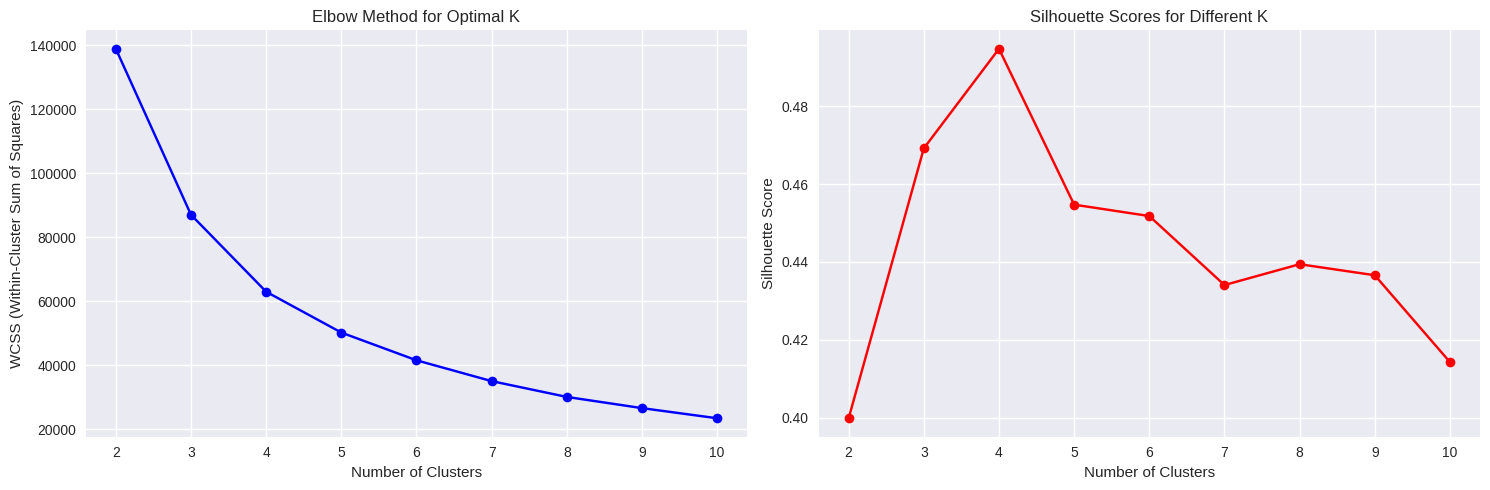

Optimal number of clusters based on silhouette score: 4
Best silhouette score: 0.4947


In [ ]:
#  Determine Optimal Number of Clusters
print("\n=== DETERMINING OPTIMAL NUMBER OF CLUSTERS ===")

# Elbow Method
wcss = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled_df)
    wcss.append(kmeans.inertia_)


    # Silhouette Score
    if k > 1:  # Silhouette score requires at least 2 clusters
        score = silhouette_score(rfm_scaled_df, kmeans.labels_)
        silhouette_scores.append(score)

# Plot Elbow Method and Silhouette Scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='red')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Find optimal k based on silhouette score
optimal_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")
print(f"Best silhouette score: {max(silhouette_scores):.4f}")

## Applying K-Means Clustering and Customer Segmentation

This section applies **K-Means clustering** to group customers based on their `Recency`, `Frequency`, and `Monetary` (RFM) metrics, followed by an interpretive analysis of each cluster to derive actionable business insights.

**1. Applying K-Means Clustering**
Using the optimal number of clusters (`optimal_k`) determined earlier, the **K-Means algorithm** is fitted on the scaled RFM dataset.
Each customer is assigned to a cluster based on their RFM profile, capturing behavioral similarities such as purchase recency, transaction frequency, and total spending.
The results are stored in a new column `Cluster` within the `rfm_df` DataFrame.

**2. Cluster Analysis and Summary Statistics**
After clustering, a detailed **aggregate analysis** is performed for each cluster to understand its behavioral characteristics.
The following metrics are computed for each cluster:

* Average `Recency`, `Frequency`, and `Monetary` values.
* Mean RFM component scores (`R_Score`, `F_Score`, `M_Score`).
* Customer count (`Count`) within each cluster.
* Average account balance (`Avg_Account_Balance`).
* Most common gender (`Most_Common_Gender`).

This analysis provides a clear overview of how different customer segments behave and what distinguishes them.

**3. Assigning Descriptive Cluster Names**
To make interpretation intuitive, clusters are **automatically labeled** based on their RFM patterns and spending activity:

* **High-Value Dormant Customers:** High spenders who haven’t purchased in over a year.
* **Dormant Low-Value Customers:** Low spenders with no recent activity.
* **High-Value Inactive Customers:** High-value customers inactive for 6–12 months.
* **Inactive Low-Value Customers:** Low-spending customers inactive for months.
* **Active VIP Customers:** Frequently purchasing, high-spending customers.
* **Active Low-Value Customers:** Regularly active but low spenders.
* **Regular Customers:** Moderate in both spending and activity.

This step translates raw cluster indices into **business-friendly customer segments**, facilitating strategic actions such as re-engagement campaigns or loyalty programs.

**4. Cluster Distribution Overview**
Finally, the code computes and prints the **distribution of customers across cluster names**, showing how customers are spread among the defined behavioral categories.
This summary provides an at-a-glance understanding of the dominant customer groups and their potential business impact.


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# --- APPLY K-MEANS CLUSTERING ---
print(f"\n=== APPLYING K-MEANS WITH {optimal_k} CLUSTERS ===")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled_df)
rfm_df.head()


=== APPLYING K-MEANS WITH 4 CLUSTERS ===


,CustomerID,Recency,Frequency,Monetary,CustomerDOB,CustGender,CustLocation,CustAccountBalance,R_Score,F_Score,M_Score,RFM_Score,RFM_Group,Cluster,Cluster_Name
0,C1000107,1040,1,96.41,2001-06-27,F,South Josh,1150.66,1,1,1,3,111,1,Inactive Low-Value Customers
1,C1000111,8,16,819.81,1952-11-18,M,New Peter,52895.11,5,4,2,11,542,2,Active Low-Value Customers
2,C1000159,106,15,695.53,1988-07-23,M,Lake Duncanburgh,3006.98,3,4,2,9,342,2,Active Low-Value Customers
3,C1000852,178,24,1355.99,1985-10-06,M,Thomasborough,11922.49,2,5,4,11,254,2,Active Low-Value Customers
4,C1000896,56,14,65914.10,1945-04-10,M,East Kim,43815.21,4,3,5,12,435,0,Active VIP Customers


In [ ]:
rfm_df["Cluster"].value_counts()

,count
Cluster,
2,31798
1,22478
0,15364
3,11901


In [ ]:

# --- ANALYZE CLUSTERS ---
cluster_analysis = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean',
    'CustomerID': 'count',
    'CustAccountBalance': 'mean',
    'CustGender': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
}).round(2)

cluster_analysis.columns = [
    'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary',
    'Avg_R_Score', 'Avg_F_Score', 'Avg_M_Score',
    'Count', 'Avg_Account_Balance', 'Most_Common_Gender'
]

print("Cluster Analysis:")
display(cluster_analysis)


Cluster Analysis:


,Avg_Recency,Avg_Frequency,Avg_Monetary,Avg_R_Score,Avg_F_Score,Avg_M_Score,Count,Avg_Account_Balance,Most_Common_Gender
Cluster,,,,,,,,,
0,69.27,15.21,75828.79,3.70,3.65,4.98,15364,16397.80,M
1,324.12,3.45,648.34,1.92,1.77,1.74,22478,28074.14,M
2,52.52,17.84,963.53,3.95,4.03,2.52,31798,27370.33,F
3,444.97,1.77,17347.04,1.64,1.17,4.10,11901,24691.85,M


In [ ]:

# --- REFINED CLUSTER NAMING BASED ON RECENCY FIRST ---
def assign_cluster_name(stats):
    recency = stats['Avg_Recency']
    frequency = stats['Avg_Frequency']
    monetary = stats['Avg_Monetary']

    # Recency thresholds
    if recency > 365:
        # Haven't purchased in a year
        if monetary > 20000:
            return "High-Value Dormant Customers"
        else:
            return "Dormant Low-Value Customers"
    elif recency > 180:
        # Haven't purchased in 6-12 months
        if monetary > 20000:
            return "High-Value Inactive Customers"
        else:
            return "Inactive Low-Value Customers"

    # Active customers (recent transactions)
    if frequency > 10 and monetary > 30000:
        return "Active VIP Customers"
    elif frequency > 8 and monetary < 10000:
        return "Active Low-Value Customers"
    else:
        return "Regular Customers"

# Map names dynamically
rfm_df['Cluster_Name'] = rfm_df['Cluster'].map(lambda x: assign_cluster_name(cluster_analysis.loc[x]))



In [ ]:

# Cluster distribution
print("\nFinal Cluster Distribution:")
cluster_distribution = rfm_df['Cluster_Name'].value_counts()
print(cluster_distribution)


Final Cluster Distribution:
Cluster_Name
Active Low-Value Customers      31798
Inactive Low-Value Customers    22478
Active VIP Customers            15364
Dormant Low-Value Customers     11901
Name: count, dtype: int64


## Customer Segmentation Visualization and Cluster Profiling

This section provides a **visual and statistical summary** of customer segments derived from K-Means clustering on RFM metrics. The goal is to better understand segment characteristics, proportions, and behavioral differences through aggregated metrics and clear visual representations.

**1. Cluster Profile Generation**
The first step computes **summary statistics** for each customer segment (`Cluster_Name`) using the RFM dataset.
The following metrics are aggregated:

* `Recency`, `Frequency`, and `Monetary`: Mean and standard deviation to capture both central tendency and variation within clusters.
* `Customer_Count`: Number of customers per cluster.
* `Avg_Account_Balance`: Average account balance for customers in each group.
  Additionally, a `Percentage` column is calculated to show each segment’s share of the total customer base.

This statistical summary provides the foundation for quantitative comparison between clusters.

**2. Customer Distribution Pie Chart**
A **pie chart** visualizes the overall distribution of customers across all defined segments.
Each slice represents a distinct cluster, with labels showing both the percentage and absolute number of customers.
The chart gives an immediate overview of how the customer base is divided among behavioral groups — highlighting dominant and niche segments.
Distinct color schemes and slight explosion effects improve clarity and emphasis.

**3. Average RFM Values by Segment (Bar Chart)**
A **grouped bar chart** illustrates the average `Recency`, `Frequency`, and `Monetary` values across clusters:

* `Recency` reflects how recently customers purchased.
* `Frequency` indicates purchase activity level.
* `Monetary` (scaled in thousands) represents total spending.
  This comparison helps identify which segments are the most active or valuable, providing actionable insight into engagement strategies.

**4. Segment Size Comparison (Horizontal Bar Chart)**
A **horizontal bar chart** ranks customer segments by their population size.
It visually compares the number of customers per cluster, helping to identify:

* Large, general segments representing the majority of the customer base.
* Smaller, specialized segments like high-value or dormant customers.
  Labels on each bar display exact counts for readability and quick reference.

**5. Insights and Strategic Use**
Together, these visuals form a comprehensive customer intelligence dashboard:

* The **pie chart** gives macro-level proportions.
* The **bar charts** reveal micro-level behavioral and value differences.
* The **cluster profile table** connects statistical rigor with visual storytelling.

This stage enables businesses to tailor marketing actions, allocate resources effectively, and design retention or reactivation campaigns based on data-driven customer segmentation insights.


Cluster profiles created successfully!


,Avg_Recency,Std_Recency,Avg_Frequency,Std_Frequency,Avg_Monetary,Std_Monetary,Customer_Count,Avg_Account_Balance,Percentage
Cluster_Name,,,,,,,,,
Active Low-Value Customers,52.52,50.08,17.84,6.03,963.53,277.63,31798,27370.33,39.00
Active VIP Customers,69.27,67.66,15.21,4.65,75828.79,22739.72,15364,16397.80,18.84
Dormant Low-Value Customers,444.97,294.22,1.77,0.89,17347.04,8393.16,11901,24691.85,14.60
Inactive Low-Value Customers,324.12,249.54,3.45,2.09,648.34,356.37,22478,28074.14,27.57


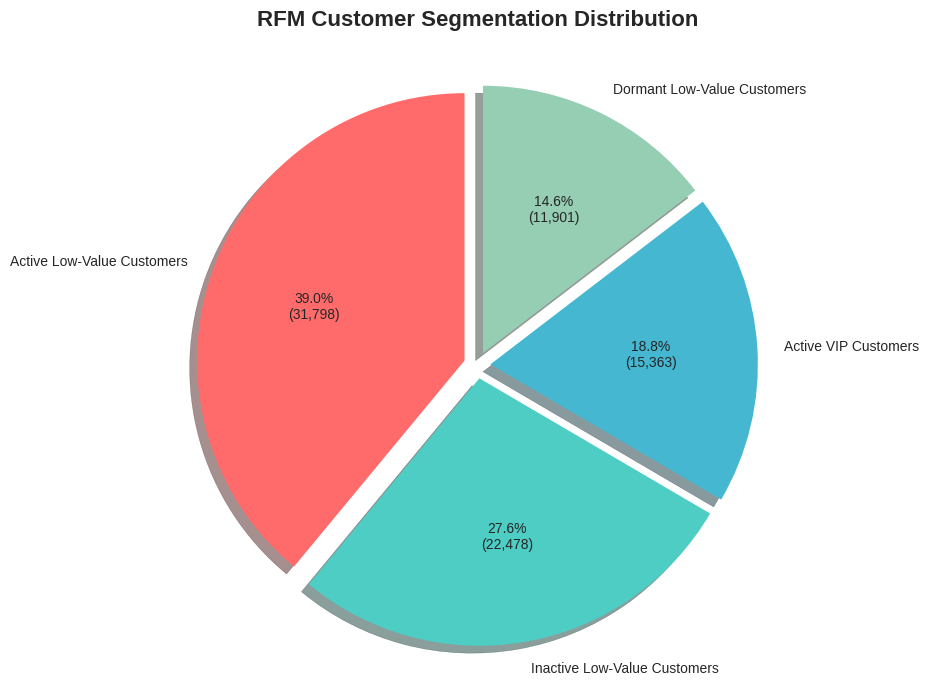

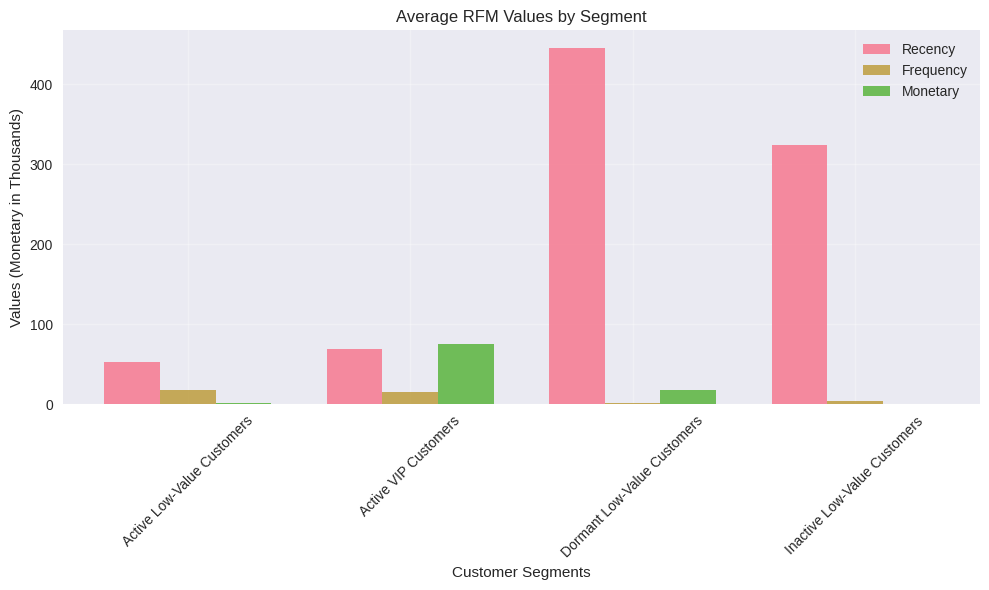

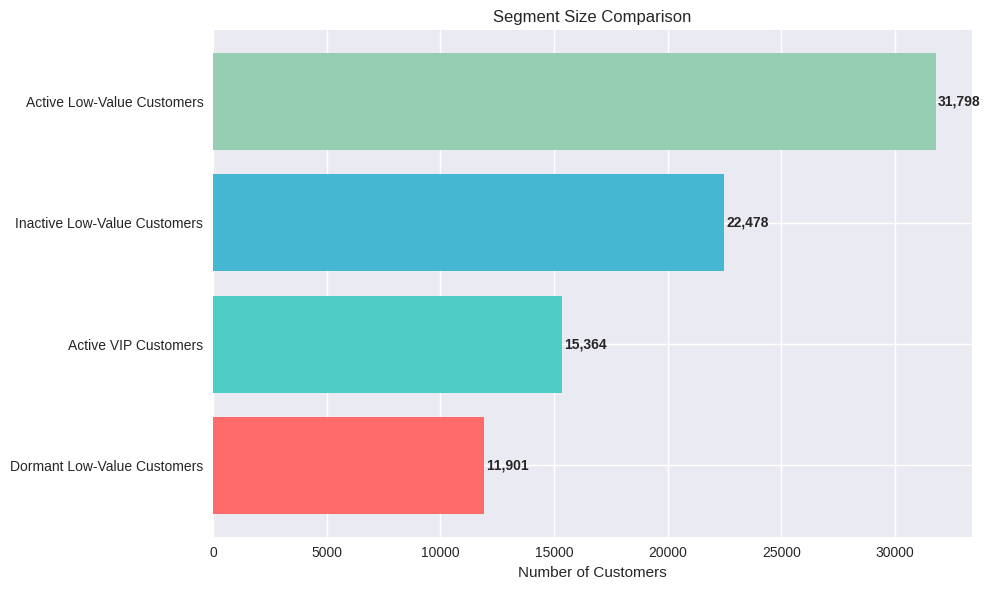

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Generate cluster profiles from rfm_df ---
cluster_profiles = rfm_df.groupby('Cluster_Name').agg({
    'Recency': ['mean','std'],
    'Frequency': ['mean','std'],
    'Monetary': ['mean','std'],
    'CustomerID':'count',
    'CustAccountBalance':'mean'
}).round(2)

# Flatten columns
cluster_profiles.columns = ['_'.join(col).strip() for col in cluster_profiles.columns.values]
cluster_profiles = cluster_profiles.rename(columns={
    'Recency_mean':'Avg_Recency','Recency_std':'Std_Recency',
    'Frequency_mean':'Avg_Frequency','Frequency_std':'Std_Frequency',
    'Monetary_mean':'Avg_Monetary','Monetary_std':'Std_Monetary',
    'CustomerID_count':'Customer_Count','CustAccountBalance_mean':'Avg_Account_Balance'
})
cluster_profiles['Percentage'] = (cluster_profiles['Customer_Count']/len(rfm_df)*100).round(2)

print("Cluster profiles created successfully!")
display(cluster_profiles)


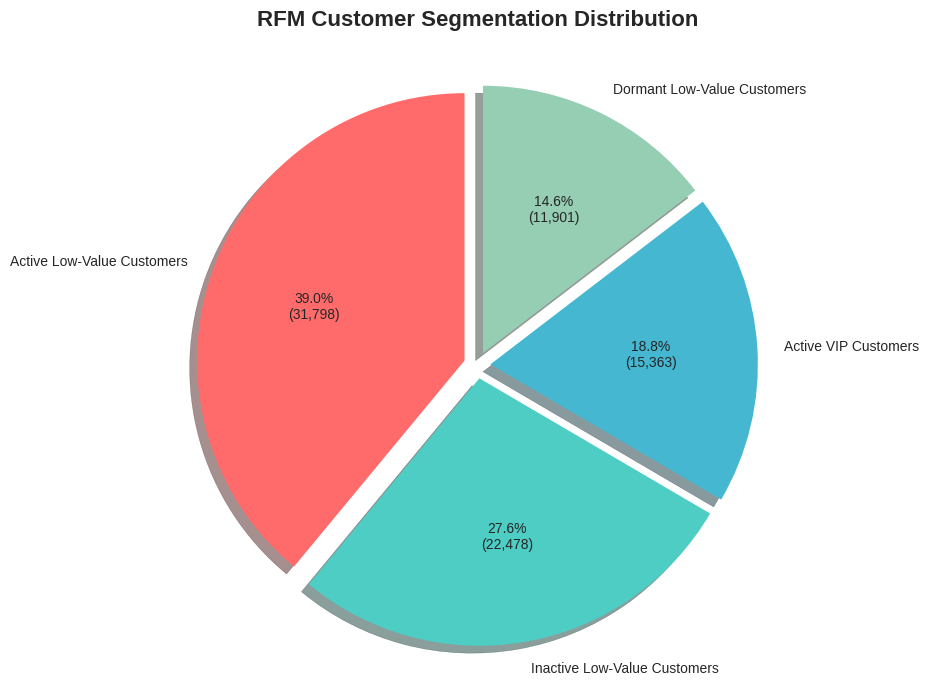

In [ ]:

# --- Colors ---
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']

# --- Big Pie Chart for Customer Distribution ---
segment_counts = rfm_df['Cluster_Name'].value_counts()
plt.figure(figsize=(12, 8))
explode = [0.05] * len(segment_counts)
plt.pie(segment_counts.values,
        labels=segment_counts.index,
        autopct=lambda p: f'{p:.1f}%\n({int(p*sum(segment_counts.values)/100):,})',
        startangle=90,
        colors=colors[:len(segment_counts)],
        explode=explode,
        shadow=True)
plt.title('RFM Customer Segmentation Distribution\n', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()


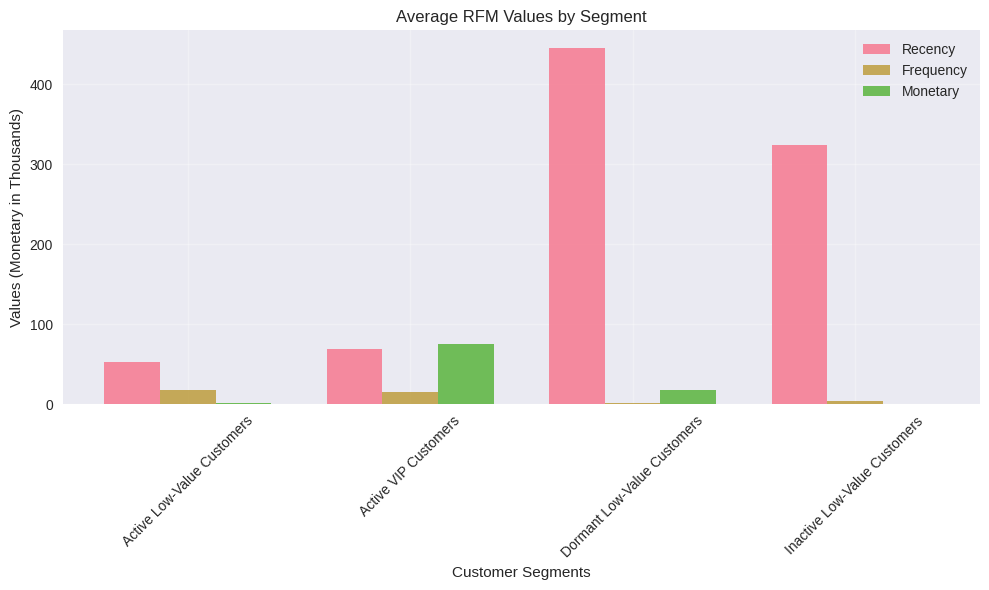

In [ ]:

# --- Bar Chart - Average RFM by Segment ---
plt.figure(figsize=(10, 6))
rfm_metrics = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary']
x_pos = np.arange(len(cluster_profiles))
width = 0.25

for i, metric in enumerate(rfm_metrics):
    values = cluster_profiles[metric].values
    if metric == 'Avg_Monetary':
        values = values / 1000  # Thousands
    plt.bar(x_pos + i*width, values, width, label=metric.replace('Avg_', ''), alpha=0.8)

plt.xlabel('Customer Segments')
plt.ylabel('Values (Monetary in Thousands)')
plt.title('Average RFM Values by Segment')
plt.xticks(x_pos + width, cluster_profiles.index, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


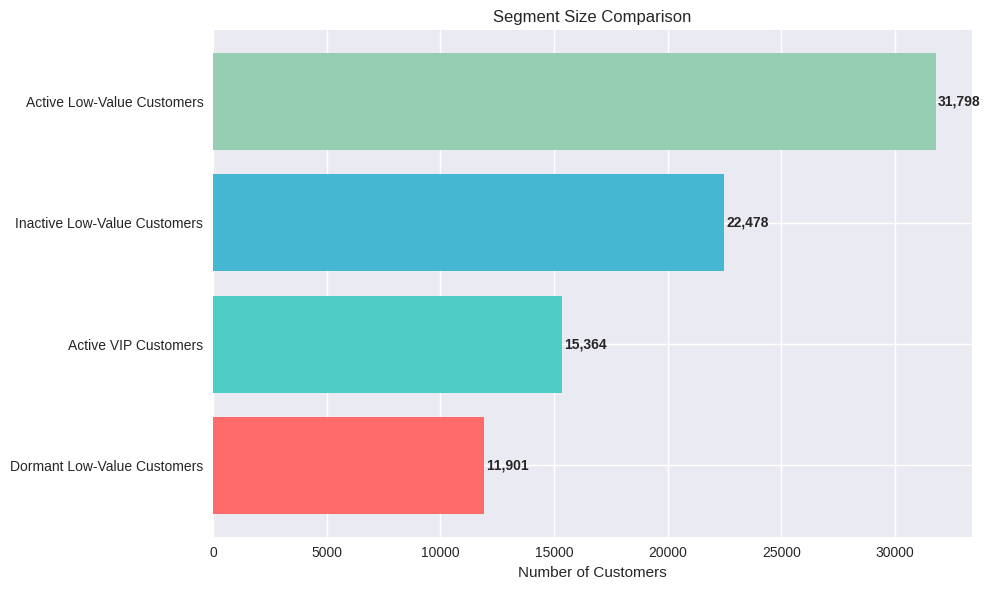

In [ ]:

# --- Horizontal Bar Chart - Segment Sizes ---
plt.figure(figsize=(10, 6))
segment_sizes = cluster_profiles.sort_values('Customer_Count')['Customer_Count']
plt.barh(range(len(segment_sizes)), segment_sizes.values, color=colors[:len(segment_sizes)])
plt.yticks(range(len(segment_sizes)), segment_sizes.index)
plt.xlabel('Number of Customers')
plt.title('Segment Size Comparison')
for i, v in enumerate(segment_sizes.values):
    plt.text(v + 100, i, f'{v:,}', va='center', fontweight='bold')
plt.tight_layout()
plt.show()


## Customer Segmentation Dataset Generation

This section defines the function `get_segmented_customers()`, which organizes, refines, and optionally exports the **final segmented customer dataset** produced after RFM analysis and clustering.

**Purpose:**
The function creates a clean and structured dataset that consolidates all relevant customer metrics, RFM scores, and their assigned clusters (both numeric and descriptive). It helps in preparing results for **analysis, visualization, or reporting**.

**Core Functionalities:**

1. **Input Data:**
   Accepts an RFM-enriched DataFrame (`rfm_df`) containing metrics such as `Recency`, `Frequency`, `Monetary`, RFM scores, and clustering results.

2. **Output Customization:**

   * When `include_all_columns=False`, only key columns are retained for clarity:
     `CustomerID`, `Recency`, `Frequency`, `Monetary`, `R_Score`, `F_Score`, `M_Score`, `Cluster`, and `Cluster_Name`.
   * When `include_all_columns=True`, the complete DataFrame is returned, preserving all original attributes for deeper analysis.

3. **Sorting Logic:**
   The resulting dataset is sorted **first by `Cluster_Name`** (grouping customers within the same segment) and then by **`Monetary` in descending order**, highlighting the most valuable customers in each group.

4. **Optional Export:**
   If a file path is provided via `output_csv`, the dataset is automatically exported as a CSV file. A success message confirms the save location for traceability.

5. **Output Summary:**
   After processing, the function prints a short summary showing:

   * The total number of customers included.
   * The number of distinct customer segments (`Cluster_Name`) identified.

6. **Return Value:**
   Returns the processed and sorted DataFrame, which can be displayed directly (as shown using `display(segmented_df.head())`) or used for subsequent business reporting and visualization.


**Outcome:**
The function provides a structured, human-readable dataset that bridges analytical results with actionable insights — enabling quick access to customer profiles and facilitating strategic segmentation-driven marketing decisions.


In [ ]:
def get_segmented_customers(rfm_df, include_all_columns=False, output_csv=None):
    """
    Returns a clean dataset of all customers with their RFM metrics,
    assigned cluster number, and human-readable segment name.
    Optionally saves the dataset to a CSV file.

    Parameters:
    -----------
    rfm_df : pd.DataFrame
        DataFrame containing RFM metrics and clustering results.
    include_all_columns : bool, default False
        If True, returns all columns in rfm_df for full context.
        If False, returns a concise view with key metrics and cluster info.
    output_csv : str or None, default None
        File path to save the dataset as CSV. If None, does not save.

    Returns:
    --------
    pd.DataFrame
        Segmented customer dataset, sorted by Cluster_Name and Monetary.
    """

    # Base columns to always include
    base_columns = [
        'CustomerID', 'Recency', 'Frequency', 'Monetary',
        'R_Score', 'F_Score', 'M_Score',
        'Cluster', 'Cluster_Name'
    ]

    if include_all_columns:
        segmented_customers = rfm_df.copy()
    else:
        available_columns = [col for col in base_columns if col in rfm_df.columns]
        segmented_customers = rfm_df[available_columns].copy()

    # Sort by Cluster_Name first, then Monetary descending
    segmented_customers.sort_values(by=['Cluster_Name', 'Monetary'], ascending=[True, False], inplace=True)
    segmented_customers.reset_index(drop=True, inplace=True)

    # Save to CSV if output path provided
    if output_csv:
        segmented_customers.to_csv(output_csv, index=False)
        print(f"✅ Dataset saved to CSV: {output_csv}")

    print(f"✅ Segmented dataset created: {len(segmented_customers)} customers across {rfm_df['Cluster_Name'].nunique()} segments.")
    return segmented_customers

# --- Usage example ---
segmented_df = get_segmented_customers(rfm_df, include_all_columns=False, output_csv="rfm_segmented_customers.csv")
display(segmented_df.head())


✅ Dataset saved to CSV: rfm_segmented_customers.csv
✅ Segmented dataset created: 81541 customers across 4 segments.


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Cluster,Cluster_Name
0,C5137094,11,19,9004.68,5,4,4,2,Active Low-Value Customers
1,C6537308,4,7,7719.77,5,3,4,2,Active Low-Value Customers
2,C9210351,14,15,7346.70,5,4,4,2,Active Low-Value Customers
3,C6048656,3,1,7182.69,5,1,4,2,Active Low-Value Customers
4,C5707078,1,28,7046.85,5,5,4,2,Active Low-Value Customers


In [ ]:
segmented_df["Cluster_Name"].value_counts()

,count
Cluster_Name,
Active Low-Value Customers,31798
Inactive Low-Value Customers,22478
Active VIP Customers,15364
Dormant Low-Value Customers,11901


In [4]:
print(list(range(2, 11)))

[2, 3, 4, 5, 6, 7, 8, 9, 10]
